# faire un code qui permet d'obtenir la description du genre à partir de son identifiant (possibilité de voir les associations entre descriptions et identifiants directement sur la bdd)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# On lit le fichier CSV des genres et on affiche le dataframe pour voir les associations entre les descriptions et les id
df_genre_init = pd.read_csv("PlayGenre-2024-06-14.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_genre_init

,id,description
0,13,Parodie
1,12,Ballet pantomime
2,11,Opéra-comique
3,10,Feux d'artifice
4,9,Tragédie
5,8,Tragi-comédie
6,7,Comédie à l'impromptu
7,6,Comédie
8,5,Divertissement
9,4,Ballet


# On merge les dataframes soirées, représentations et pièces

In [3]:
# On lit le fichier CSV des soirées et on affiche le dataframe 
df_soirée = pd.read_csv("Event-2024-06-14.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_soirée

,id,note,location,date
0,28188,NaN,3,1761-11-04
1,28187,NaN,3,1756-12-07
2,28186,NaN,3,1736-10-27
3,28185,NaN,3,1736-10-20
4,28184,NaN,3,1736-10-13
...,...,...,...,...
28017,5,NaN,1,1723-01-05
28018,4,NaN,1,1723-01-04
28019,3,NaN,1,1723-01-03
28020,2,NaN,1,1723-01-02


In [4]:
# On lit le fichier CSV des représentations et on affiche le dataframe
df_representation = pd.read_csv("Representation-2024-06-14.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_representation

,id,note,play,event,representation_order
0,16211,NaN,33,8552,4.0
1,16210,NaN,1004,8551,3.0
2,16209,NaN,551,8551,2.0
3,16208,NaN,315,8551,1.0
4,16207,NaN,662,8549,3.0
...,...,...,...,...,...
16014,7,NaN,40,10010,NaN
16015,6,NaN,31,10008,NaN
16016,5,NaN,39,10006,NaN
16017,4,NaN,14,10003,NaN


In [5]:
df_joined = df_soirée.merge(df_representation, left_on= 'id', right_on='event')
df_joined

,id_x,note_x,location,date,id_y,note_y,play,event,representation_order
0,28188,NaN,3,1761-11-04,14964,NaN,677,28188,6.0
1,28188,NaN,3,1761-11-04,14963,NaN,945,28188,5.0
2,28187,NaN,3,1756-12-07,11194,Le même jour on devait représenter à Versaille...,640,28187,4.0
3,28186,NaN,3,1736-10-27,10063,NaN,405,28186,2.0
4,28186,NaN,3,1736-10-27,10059,NaN,18,28186,1.0
...,...,...,...,...,...,...,...,...,...
16014,2,NaN,1,1723-01-02,1631,NaN,3,2,NaN
16015,2,NaN,1,1723-01-02,1630,NaN,2,2,NaN
16016,1,NaN,1,1723-01-01,1629,NaN,1,1,7.0
16017,1,NaN,1,1723-01-01,1628,NaN,167,1,NaN


In [6]:
df_joined = df_joined.rename(columns= {'id_x' : 'id_soirée', 'id_y' : 'id_representation'})
df_joined

,id_soirée,note_x,location,date,id_representation,note_y,play,event,representation_order
0,28188,NaN,3,1761-11-04,14964,NaN,677,28188,6.0
1,28188,NaN,3,1761-11-04,14963,NaN,945,28188,5.0
2,28187,NaN,3,1756-12-07,11194,Le même jour on devait représenter à Versaille...,640,28187,4.0
3,28186,NaN,3,1736-10-27,10063,NaN,405,28186,2.0
4,28186,NaN,3,1736-10-27,10059,NaN,18,28186,1.0
...,...,...,...,...,...,...,...,...,...
16014,2,NaN,1,1723-01-02,1631,NaN,3,2,NaN
16015,2,NaN,1,1723-01-02,1630,NaN,2,2,NaN
16016,1,NaN,1,1723-01-01,1629,NaN,1,1,7.0
16017,1,NaN,1,1723-01-01,1628,NaN,167,1,NaN


In [7]:
# On lit le fichier CSV des pièces et on affiche le dataframe
df_plays = pd.read_csv("Play-2024-06-14.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_plays

,id,note,original_title,number_of_acts,entertainment,has_prologue,genre,type,language,edition,source
0,1036,[cha]\r\n«Hipolite et Aricie/ Parodie/ Par M.r...,1039,1,NaN,NaN,13.0,3.0,2.0,"Esiste una pubblicazione Hippolite et Aricie, ...","BnF, Ms. f. fr. 9334, ff. 18r-36r. BnF, Départ..."
1,1035,NaN,1038,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1034,"GUEULLETTE 1938, p. 111: «Comédie française, e...",1037,3,1.0,NaN,6.0,1.0,2.0,"Argument in Nou. Th. It., 1733, vol. I, pp. 31...","BnF, Ms. f. fr. 9308, ff. 296r-352v. Segue la ..."
3,1033,NaN,1036,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1032,NaN,1035,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1024,5,NaN,5,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1025,4,Commedia con la quale Marivaux incammina il re...,4,1,NaN,0.0,6.0,1.0,2.0,"Paris, Veuve Guillaume, 1720. Confluita in Nou...",NaN
1026,3,"PARFAICT 1767, vol. VII, p. 385: «Un acte en p...",3,1,1.0,0.0,6.0,3.0,2.0,"In GHERARDI 1700, vol. V, pp. 513-549. In GHER...",NaN
1027,2,"GUEULLETTE 1938, p. 87: «Cette pièce est de Le...",2,3,NaN,0.0,7.0,NaN,1.0,"Argument in Nou. Th. It., 1733, vol. I, pp. 48...",NaN


/!\ correction ci-dessous /!\

In [8]:
df_joined2 = df_joined.merge(df_plays, left_on= 'play', right_on='id')
df_joined2 

,id_soirée,note_x,location,date,id_representation,note_y,play,event,representation_order,id,note,original_title,number_of_acts,entertainment,has_prologue,genre,type,language,edition,source
0,28188,NaN,3,1761-11-04,14964,NaN,677,28188,6.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
1,17130,NaN,1,1762-10-20,15862,NaN,677,17130,2.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
2,17043,NaN,1,1762-07-25,15608,NaN,677,17043,1.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
3,16883,NaN,1,1762-02-15,15213,NaN,677,16883,2.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
4,16848,NaN,1,1762-01-11,15124,NaN,677,16848,1.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,28,NaN,1,1723-01-28,1668,NaN,9,28,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN
16015,24,NaN,1,1723-01-24,1663,NaN,9,24,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN
16016,19,NaN,1,1723-01-19,1658,NaN,9,19,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN
16017,17,NaN,1,1723-01-17,1655,NaN,9,17,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN


In [9]:
# On renomme le 3e id en id_piece
df_joined2 = df_joined2.rename(columns= {'id' : 'id_piece'})
df_joined2

,id_soirée,note_x,location,date,id_representation,note_y,play,event,representation_order,id_piece,note,original_title,number_of_acts,entertainment,has_prologue,genre,type,language,edition,source
0,28188,NaN,3,1761-11-04,14964,NaN,677,28188,6.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
1,17130,NaN,1,1762-10-20,15862,NaN,677,17130,2.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
2,17043,NaN,1,1762-07-25,15608,NaN,677,17043,1.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
3,16883,NaN,1,1762-02-15,15213,NaN,677,16883,2.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
4,16848,NaN,1,1762-01-11,15124,NaN,677,16848,1.0,677,"GUEULLETTE 1938, p. 152: «Comédie italienne no...",678,1,NaN,NaN,7.0,4.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,28,NaN,1,1723-01-28,1668,NaN,9,28,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN
16015,24,NaN,1,1723-01-24,1663,NaN,9,24,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN
16016,19,NaN,1,1723-01-19,1658,NaN,9,19,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN
16017,17,NaN,1,1723-01-17,1655,NaN,9,17,NaN,9,"GUEULLETTE 1938, p. 101: «Par Mr. Delisle. Fut...",9,3,1.0,1.0,6.0,1.0,2.0,"Una chanson e un vaudeville in Nou. Th. It., 1...",NaN


# A la fin il faut avoir un tableau où on a les dates et les genres des pièces

In [10]:
# On supprime les colonnes inutiles
df_joined_final = df_joined2.drop(columns=['id_soirée', 'play', 'event', 'representation_order', 'id_piece', 'original_title', 'id_representation', 'note_x', 'note_y', 'note', 'location', 'number_of_acts', 'entertainment', 'has_prologue', 'type', 'language', 'edition', 'source'])
df_joined_final

,date,genre
0,1761-11-04,7.0
1,1762-10-20,7.0
2,1762-07-25,7.0
3,1762-02-15,7.0
4,1762-01-11,7.0
...,...,...
16014,1723-01-28,6.0
16015,1723-01-24,6.0
16016,1723-01-19,6.0
16017,1723-01-17,6.0


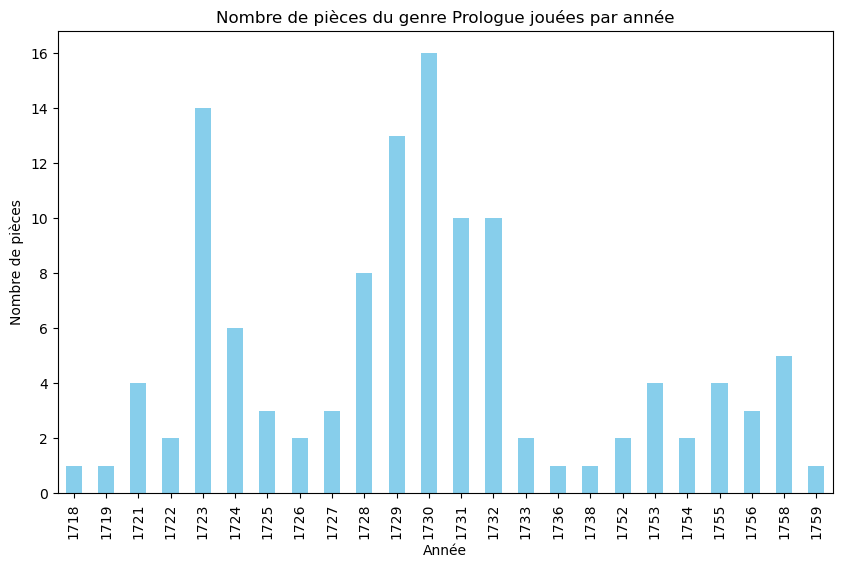

In [11]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 3.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Prologue jouées par année')
plt.show()

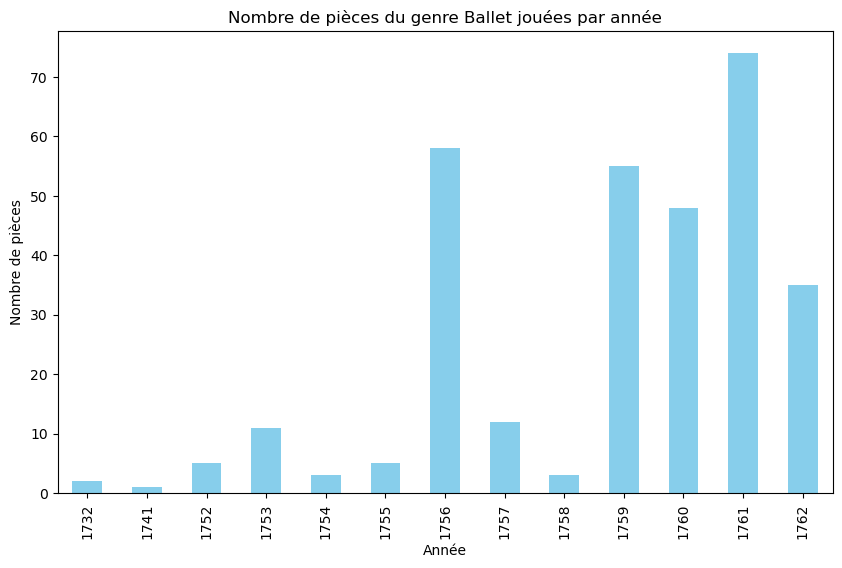

In [12]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 4.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Ballet jouées par année')
plt.show()

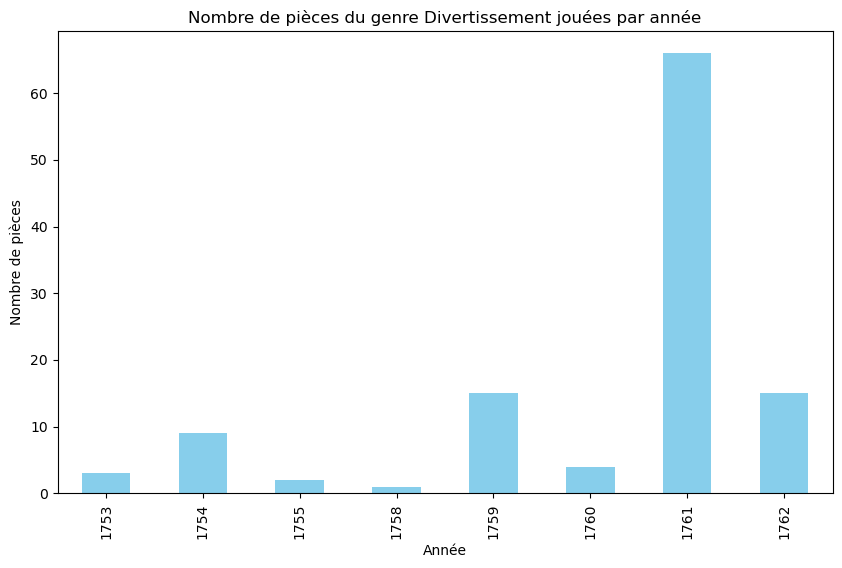

In [13]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 5.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Divertissement jouées par année')
plt.show()

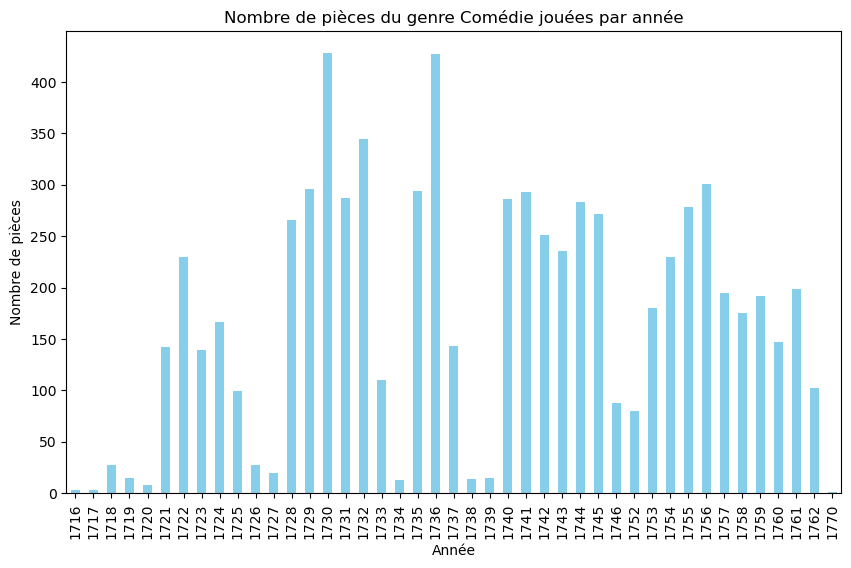

In [14]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 6.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Comédie jouées par année')
plt.show()

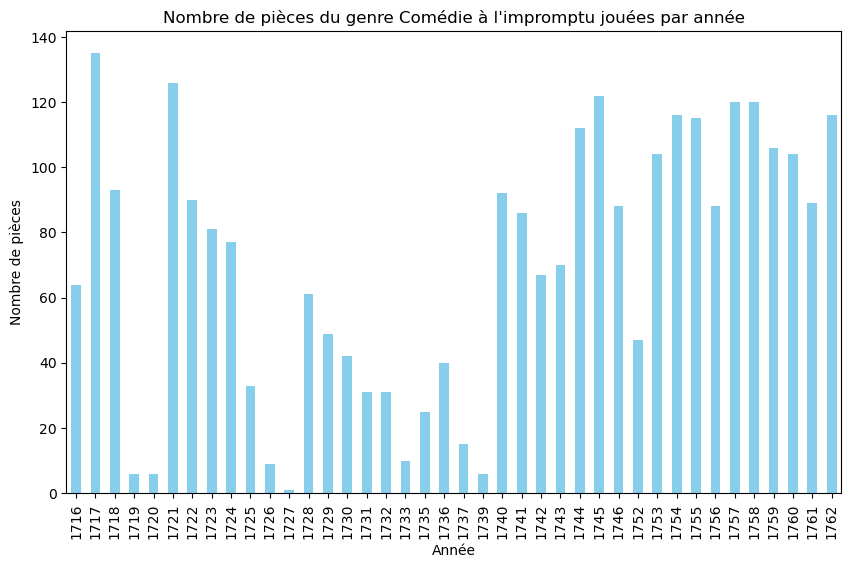

In [15]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 7.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Comédie à l\'impromptu jouées par année')
plt.show()

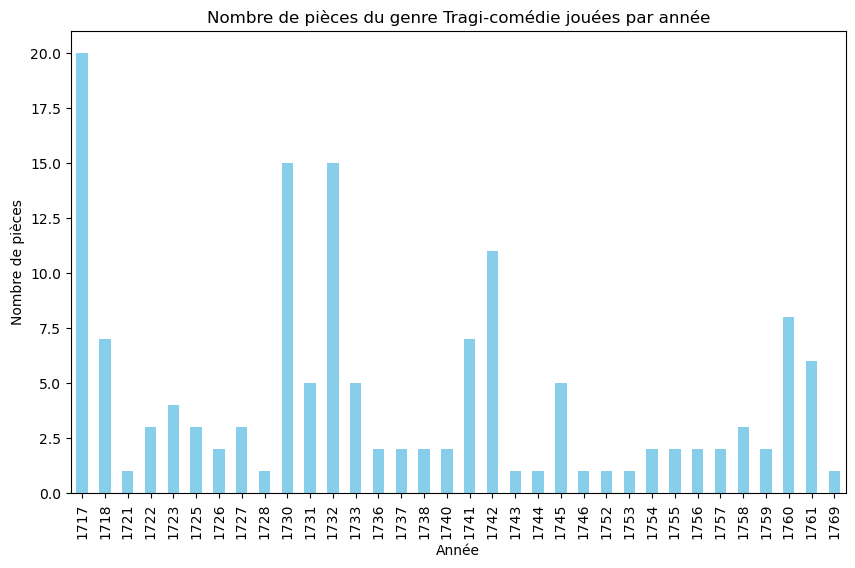

In [16]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 8.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Tragi-comédie jouées par année')
plt.show()

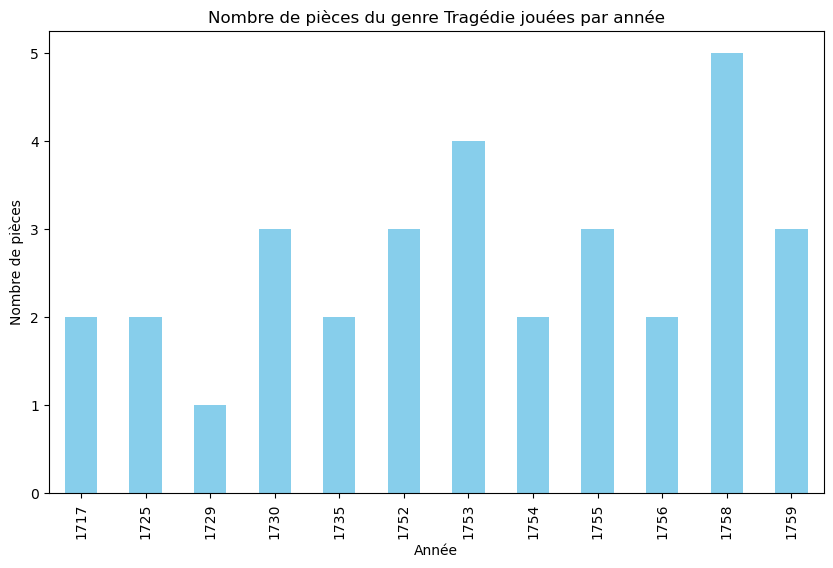

In [17]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 9.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Tragédie jouées par année')
plt.show()

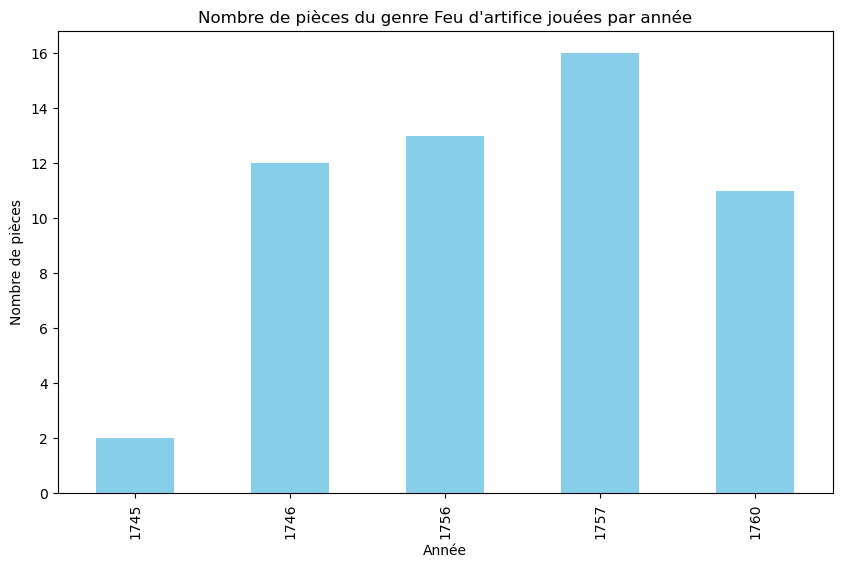

In [18]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 10.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Feu d\'artifice jouées par année')
plt.show()

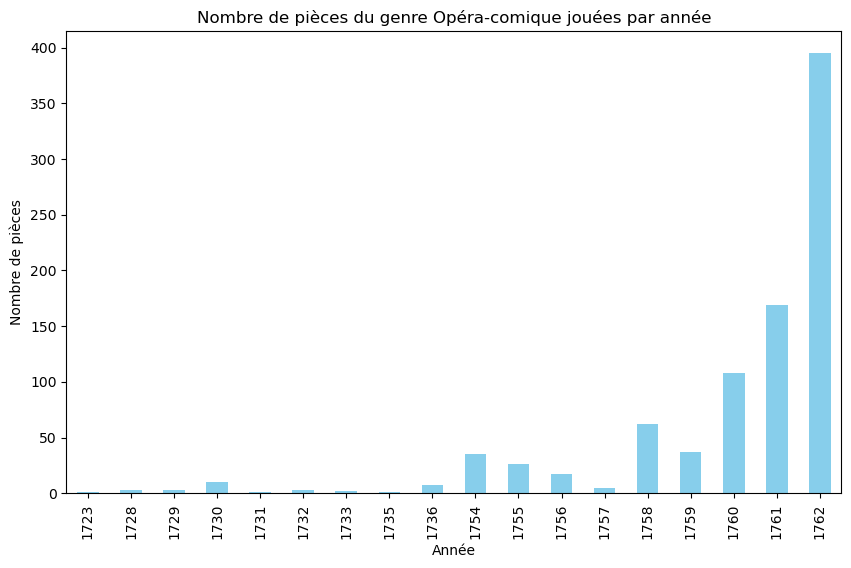

In [19]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 11.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Opéra-comique jouées par année')
plt.show()

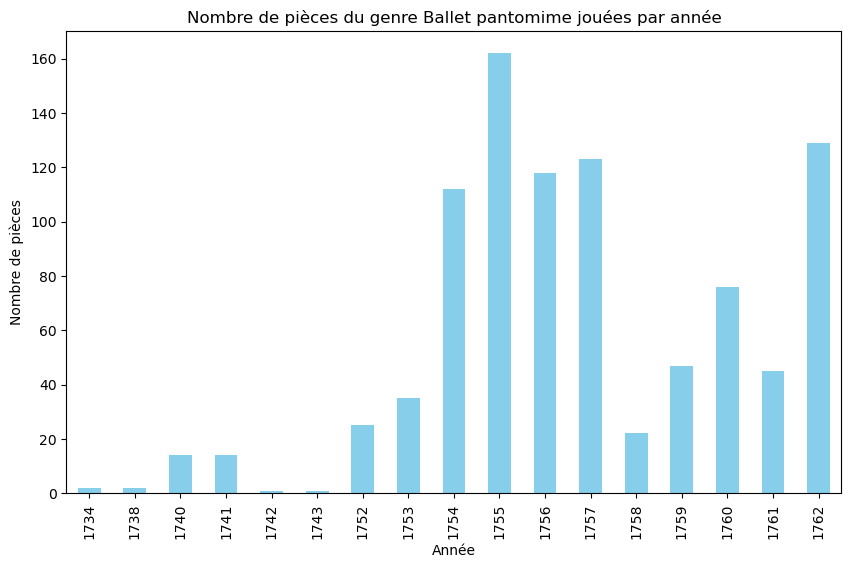

In [20]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 12.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Ballet pantomime jouées par année')
plt.show()

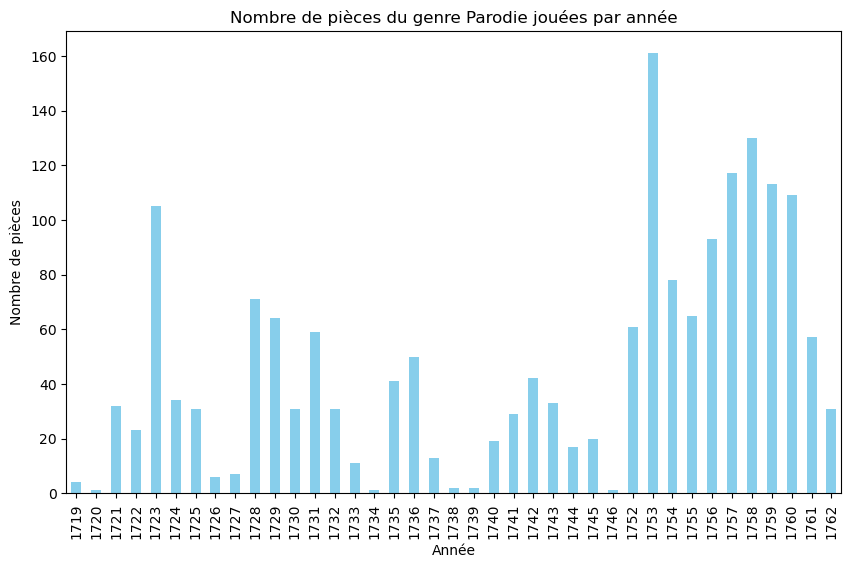

In [21]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0 
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Sélectionner un genre spécifique
genre_to_study = 13.0
df_genre = df_joined_final[df_joined_final['genre'] == genre_to_study]

# Grouper par année et compter les occurrences
yearly_counts = df_genre.groupby('year').size()

# Créer le barplot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title(f'Nombre de pièces du genre Parodie jouées par année')
plt.show()

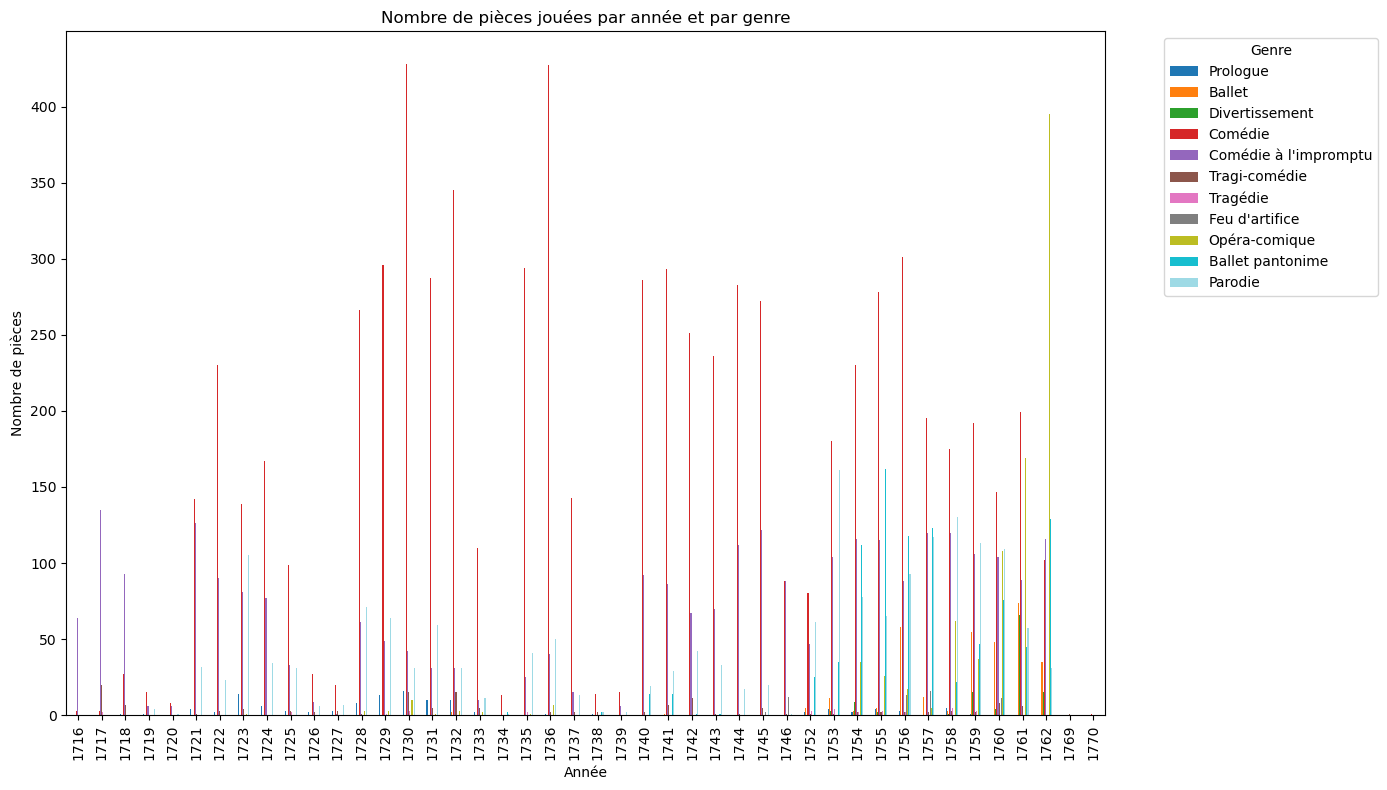

In [22]:
# Charger le DataFrame à partir du fichier CSV 
df_joined_final

# Remplacer les valeurs NaN par 0
df_joined_final['genre'] = df_joined_final['genre'].fillna(0)

# Convertir la colonne 'date' en type datetime
df_joined_final['date'] = pd.to_datetime(df_joined_final['date'])

# Extraire l'année de la colonne 'date'
df_joined_final['year'] = df_joined_final['date'].dt.year

# Dictionnaire de mappage des genres 
genre_mapping = {
    3.0: 'Prologue',
    4.0: 'Ballet',
    5.0: 'Divertissement',
    6.0: 'Comédie',
    7.0: 'Comédie à l\'impromptu',
    8.0: 'Tragi-comédie',
    9.0: 'Tragédie',
    10.0: 'Feu d\'artifice',
    11.0: 'Opéra-comique',
    12.0: 'Ballet pantonime',
    13.0: 'Parodie'
}

# Filtrer les genres à étudier
genres_to_study = list(genre_mapping.keys())
df_genre = df_joined_final[df_joined_final['genre'].isin(genres_to_study)]

# Grouper par année et genre, puis compter les occurrences
grouped = df_genre.groupby(['year', 'genre']).size().unstack(fill_value=0)

# Créer le barplot côte à côte
ax = grouped.plot(kind='bar', figsize=(14, 8), colormap='tab20')
plt.xlabel('Année')
plt.ylabel('Nombre de pièces')
plt.title('Nombre de pièces jouées par année et par genre')
plt.legend(title='Genre', labels=[genre_mapping[g] for g in grouped.columns], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Création d'un barplot intéractif

In [23]:
#on veut faire apparaître directement les noms des genres (on veut un df où on a uniquement les années et les noms des genres)
#on fait donc un merge avec le df genre du tout début du notebook
df_final = df_joined_final.merge(df_genre_init, left_on="genre", right_on="id")
#on enlève les colonnes superflues
df_final = df_final.drop(columns=['date', 'genre', 'id'])
#on renomme la colonne pour faciliter la manipulation
df_final = df_final.rename(columns= {'description' : 'genre'})
#on affiche
df_final

,year,genre
0,1761,Comédie à l'impromptu
1,1762,Comédie à l'impromptu
2,1762,Comédie à l'impromptu
3,1762,Comédie à l'impromptu
4,1762,Comédie à l'impromptu
...,...,...
14482,1729,Tragédie
14483,1717,Tragédie
14484,1717,Tragédie
14485,1725,Tragédie


In [24]:
#on regroupe par année et par genre, et on calcule la taille de chaque groupe
df_grouped = df_final.groupby(['year', 'genre']).size()
#on remet les index au même niveau
df_grouped = df_grouped.reset_index()
#on change le nom de la colonne qui contient la taille des groupes
df_grouped = df_grouped.rename(columns= {0 : 'amount'})
#on affiche
df_grouped

,year,genre,amount
0,1716,Comédie,3
1,1716,Comédie à l'impromptu,64
2,1717,Comédie,3
3,1717,Comédie à l'impromptu,135
4,1717,Tragi-comédie,20
...,...,...,...
248,1762,Divertissement,15
249,1762,Opéra-comique,395
250,1762,Parodie,31
251,1769,Tragi-comédie,1


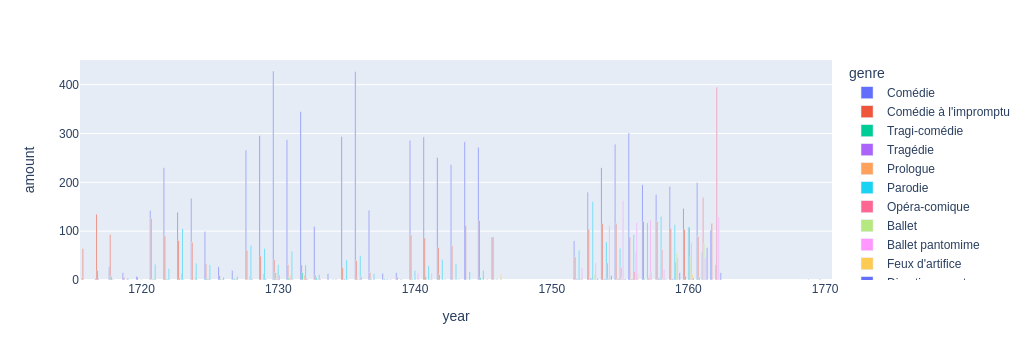

In [29]:
#on importe les librairies pour les graphiques intéractifs
import seaborn as sns
import plotly.express as px

#on génère un barplot
#on utilise color="genre" pour dire qu'on veut distinguer selon les genre en donnant une couleur différente à chaque valeur
#on utilise barmode="group" pour regrouper le long de l'axe x
fig = px.bar(df_grouped, x='year', y='amount', color="genre", barmode="group")
#on affiche
fig.show()